In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris_X = iris.data

pca = PCA(n_components=2)
iris_X_2d = pca.fit_transform(iris_X)

In [3]:
hie_clustering = AgglomerativeClustering(n_clusters=3).fit(iris_X_2d)
hie_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [59]:
from collections import Counter
Counter(hie_clustering.labels_)

Counter({1: 50, 0: 63, 2: 37})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


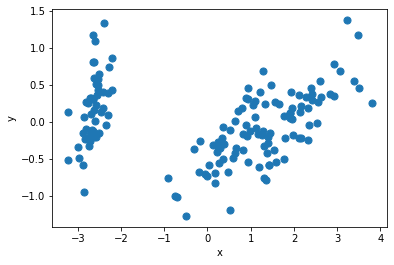

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(iris_X_2d[:,0], iris_X_2d[:,1],s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


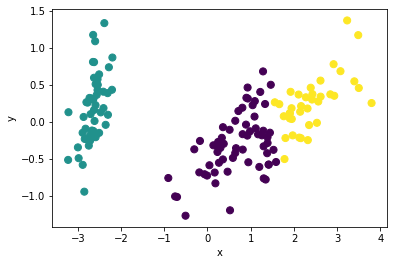

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(iris_X_2d[:,0], iris_X_2d[:,1],c=hie_clustering.labels_,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

In [65]:
def cal_euclidean_dis(X1, X2):
    dis_vector = (X1-X2)**2
    return np.sqrt(sum(dis_vector))


class ClusterNode:
    def __init__(self, vec, id_idx, left=None, right=None, distance=0.0, node_vector=None):
        self.leftnode = left
        self.rightnode = right
        self.vec = vec
        self.id_idx = id_idx
        self.distance = distance
        
        #if there is no cluster yet, each data point is a cluster
        if node_vector is None:
            self.node_vector = [id_idx] 
        else:
            self.node_vector = node_vector[:]


class MyHierarchicalClustering():
    def __init__(self, n_cluster=2, affinity="euclidean", linkage="average"):
        self.n_cluster = n_cluster
        self.affinity = affinity
        self.linkage = linkage
        self.labels = None
    
        
    def fit(self, X):
        k = X.shape[0]
        self.clusters = [ClusterNode(vec=np.array(X[i]), id_idx=i) for i in range(k)]
        distances = {}
        lowest_pair = (0, 1)
        cur_cluster_id = len(self.clusters)-1
        
        ## iterate until reaching the cluster number
        while len(self.clusters)> self.n_cluster:
            cur_cluster_id += 1
            
            min_distance = float("inf")
            ## traverse every pair of clusters for smallest distance
            for i in range(len(self.clusters)):
                for j in range(i+1, len(self.clusters)):
                    # distances to cache distance calculation
                    if (self.clusters[i].id_idx, self.clusters[j].id_idx) not in distances:
                        if self.linkage == "average":
                            distance = cal_euclidean_dis(self.clusters[i].vec, self.clusters[j].vec)
                        # Other linkage options
                    else:
                        distance = distances[(self.clusters[i].id_idx,self.clusters[j].id_idx)]
                        
                    if distance < min_distance:
                        min_distance = distance
                        lowest_pair = (i, j)
                    distances[(self.clusters[i].id_idx,self.clusters[j].id_idx)] = distance
            
            target_node_1 = self.clusters[lowest_pair[0]].vec
            target_node_2 = self.clusters[lowest_pair[1]].vec
            len_1 = len(self.clusters[lowest_pair[0]].node_vector)
            len_2 = len(self.clusters[lowest_pair[1]].node_vector)
            
            ## calculate the mean of two node
#             mean_vector = (len_1*np.mean(target_node_1, axis=1) + len_2*np.mean(target_node_1, axis=1)) \
#                           / (len_1+len_2)
            mean_vector = [(len_1*target_node_1[i] + len_2*target_node_2[i])/(len_1 +len_2)\
                          for i in range(len(self.clusters[0].vec))]

            ## create new cluster
            # create the new cluster node
            print(lowest_pair[0], lowest_pair[1])
            new_node = ClusterNode(vec = np.array(mean_vector), id_idx = cur_cluster_id, \
                                   left = self.clusters[lowest_pair[0]], \
                                    right = self.clusters[lowest_pair[1]], distance = min_distance, \
                                    node_vector = self.clusters[lowest_pair[0]].node_vector \
                                    + self.clusters[lowest_pair[1]].node_vector)
            
            # update cluster_id
            del self.clusters[lowest_pair[1]]
            del self.clusters[lowest_pair[0]]
            self.clusters.append(new_node)
            
            self.labels = {idx: list(i.node_vector) for idx,i in enumerate(self.clusters)}
            
            
    

In [66]:
[len(i.node_vector) for i in my_cluster.clusters]

[50, 37, 63]

101 142
114 146
17 28
16 30
33 36
45 69
9 30
116 120
0 136
47 82
101 120
24 25
97 101
15 35
10 34
42 62
49 78
39 48
15 21
94 95
3 118
66 124
0 29
28 118
83 101
4 23
31 32
101 108
81 99
75 89
65 92
16 24
32 40
0 3
54 55
61 74
49 99
87 90
17 97
33 75
6 15
91 105
8 13
31 40
24 44
31 52
67 86
0 76
60 83
2 90
34 74
32 86
66 74
27 32
53 71
2 15
1 10
65 75
31 70
24 90
35 44
61 84
43 82
19 54
5 6
12 25
59 72
0 3
7 60
14 49
56 61
11 14
40 57
37 47
44 55
46 64
22 27
11 14
24 35
40 62
45 48
33 68
13 57
21 33
9 34
17 18
18 25
36 41
24 25
13 33
14 29
11 12
6 28
15 21
10 23
19 26
3 38
24 40
35 47
24 36
3 38
20 33
4 5
10 39
21 25
0 34
18 20
30 33
20 27
19 40
4 25
15 24
4 11
0 11
16 17
17 27
7 14
4 6
10 16
18 30
6 11
5 8
15 18
5 15
16 23
8 10
12 15
4 5
5 9
2 8
3 4
5 6
9 17
4 7
9 13
0 10
4 13
2 4
4 11
6 7
1 6
1 3
1 3
2 4
0 4
1 2
0 1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


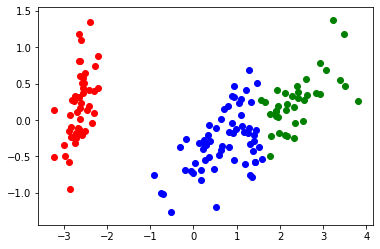

In [67]:
my_cluster = MyHierarchicalClustering(n_cluster=3)
my_cluster.fit(iris_X_2d)
colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']

j = 0
m = plt.figure(2)
for i in my_cluster.clusters:
    plt.scatter(iris_X_2d[i.node_vector].T[0], iris_X_2d[i.node_vector].T[1], color = colorset[j])
    j += 1
m.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


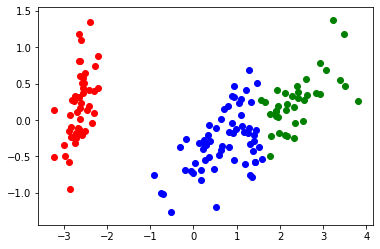

In [8]:
t_cluster = agglomerative_clustering(iris_X_2d, "avg")
colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']

j = 0
m = plt.figure(2)
for i in t_cluster:
    plt.scatter(iris_X_2d[i.node_vector].T[0], iris_X_2d[i.node_vector].T[1], color = colorset[j])
    j += 1
m.show()

In [10]:
[c.id for c in t_cluster]

[-145, -146, -147]